1. Apply Filters
2. Compare Players
3. Fitness Profile
4. Highest paid player
5. Quick stats Dashboard



C:\Users\Basit\AppData\Local\Temp\ipykernel_12840\2298790247.py:407: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Basit\AppData\Local\Temp\ipykernel_12840\2298790247.py:407: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Basit\AppData\Local\Temp\ipykernel_12840\2298790247.py:407: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Basit\AppData\Local\Temp\ipykernel_12840\2298790247.py:407: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Basit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Basit\AppData

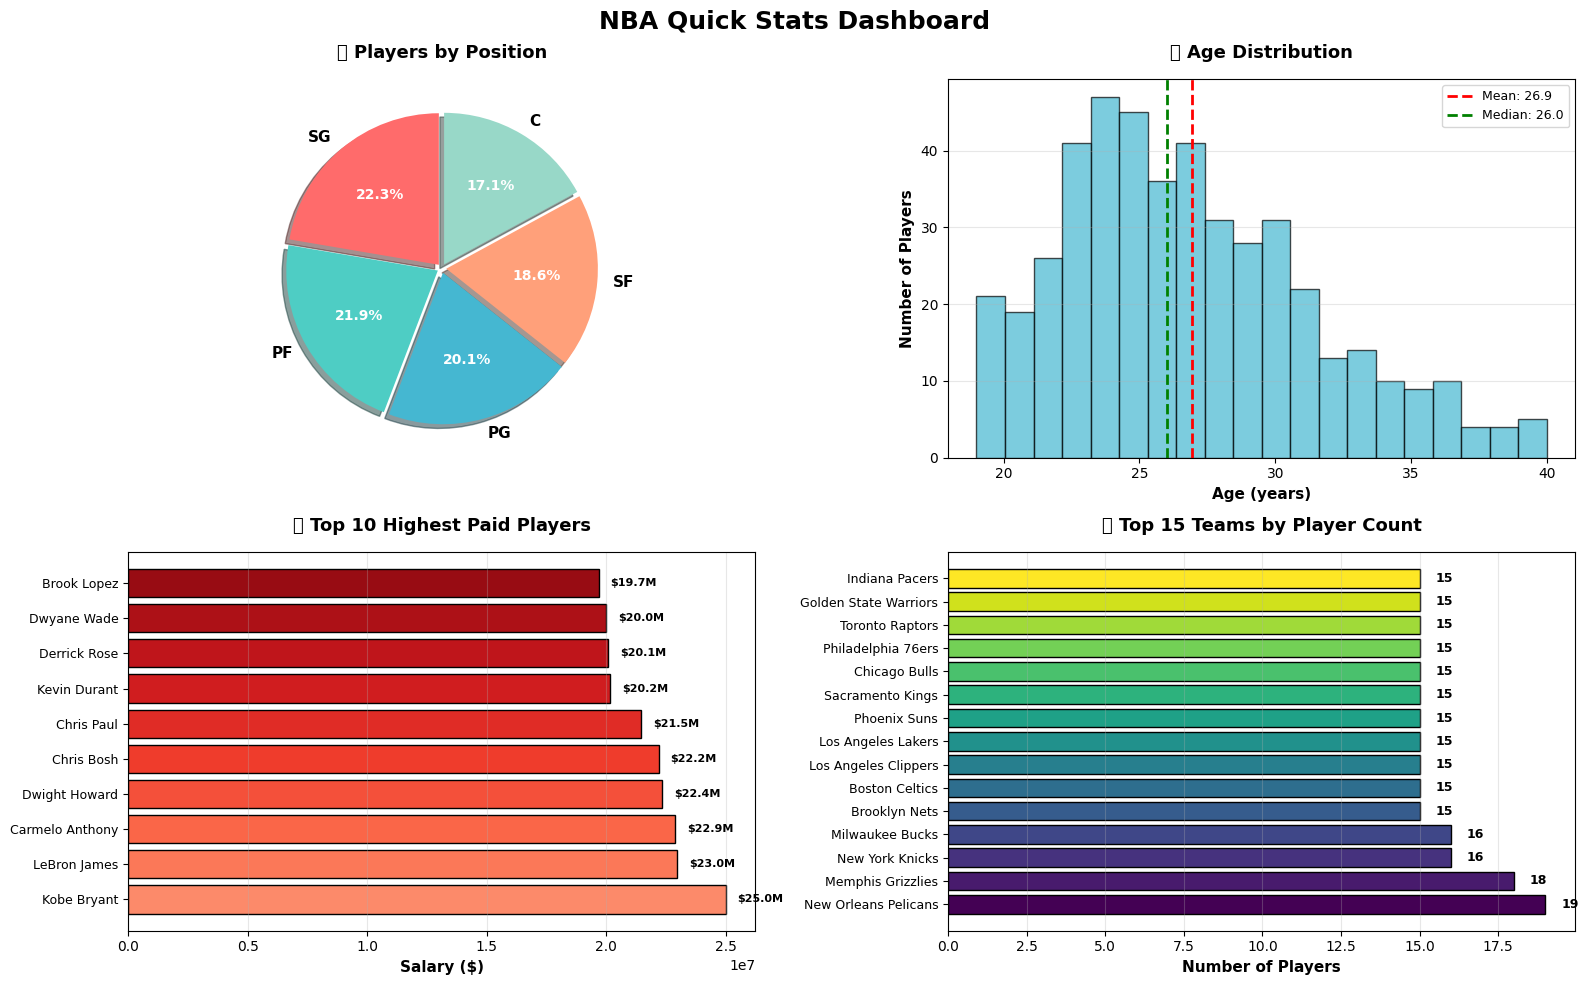


Bye Bye 👋



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("nba2.csv")

def highest_paid_player():
    highest_paid = dataset.loc[dataset["Salary"].idxmax(), ["Name", "Team", "Salary"]]
    print("Highest-Paid Player:")
    print(highest_paid)
    main_menu()

def filters_funtion():
    filter_input = '1'
    filter_list = []
    
    while filter_input != '0':
        print("\n--- Available Filters ---")
        print("1. Name")
        print("2. Team")
        print("3. Number")
        print("4. Position")
        print("5. Age")
        print("6. Weight")
        print("0. Done - Apply filters")
        print()
        filter_input = input("Enter the number of filter to apply: ")
        print()
        
        if filter_input != '0':
            filter_list.append(filter_input)
    
    # Start with the full dataset
    result = dataset.copy()

    # Apply each filter sequentially
    for filters in filter_list:
        if filters == '1':
            name_filter = input("Enter name (partial match): ").capitalize()
            result = result.loc[result["Name"].str.contains(name_filter, case=False, na=False)]
            
            if result.empty:
                print(f"No players found matching name: {name_filter}")
                break
                
        elif filters == '2':
            team_filter = input("Enter team name: ").upper()
            result = result.loc[result["Team"].str.contains(team_filter, case=False, na=False)]
            
            if result.empty:
                print(f"No players found for team: {team_filter}")
                break
                
        elif filters == '3':
            number_filter = input("Enter jersey number: ")
            try:
                result = result.loc[result["Number"] == float(number_filter)]
                
                if result.empty:
                    print(f"No players found with number: {number_filter}")
                    break
            except ValueError:
                print("Invalid number entered. Skipping this filter.")
                
        elif filters == '4':
            position_filter = input("Enter position (e.g., PG, SG, SF, PF, C): ").upper()
            result = result.loc[result["Position"].str.contains(position_filter, case=False, na=False)]
            
            if result.empty:
                print(f"No players found for position: {position_filter}")
                break
                
        elif filters == '5':
            print("Age filter options:")
            print("1. Exact age")
            print("2. Age range")
            age_option = input("Choose option: ")
            
            if age_option == '1':
                age_filter = input("Enter age: ")
                try:
                    result = result.loc[result["Age"] == float(age_filter)]
                    
                    if result.empty:
                        print(f"No players found with age: {age_filter}")
                        break
                except ValueError:
                    print("Invalid age entered. Skipping this filter.")
                    
            elif age_option == '2':
                try:
                    min_age = float(input("Enter minimum age: "))
                    max_age = float(input("Enter maximum age: "))
                    result = result.loc[(result["Age"] >= min_age) & (result["Age"] <= max_age)]
                    
                    if result.empty:
                        print(f"No players found in age range: {min_age}-{max_age}")
                        break
                    else:
                        # Ask if user wants to see pie chart visualization
                        viz_choice = input(f"\nFound {len(result)} players. Show pie chart visualization? (Y/N): ").upper()
                        if viz_choice == 'Y':
                            visualize_age_range(result, min_age, max_age)
                except ValueError:
                    print("Invalid age range entered. Skipping this filter.")

        else:
            print("Invalid filter choice. Skipping.")
        
        
    
    # Display final results
    if not result.empty:
        print("\n" + "="*80)
        print(f"FILTERED RESULTS ({len(result)} player(s) found):")
        print("="*80)
        print(result.to_string(index=False))
        print("-"*80 + "\n")
    else:
        print("\nNo players match all the applied filters.")
    
    main_menu()

def compare_players():
    print("\n" + "="*80)
    print("PLAYER COMPARISON")
    print("="*80)
    
    num_players = input("How many players do you want to compare (2-5)? ")
    
    try:
        num_players = int(num_players)
        if num_players < 2 or num_players > 5:
            print("Please enter a number between 2 and 5.")
            return
    except ValueError:
        print("Invalid input. Please enter a number.")
        return
    
    players_to_compare = []
    
    for i in range(num_players):
        print(f"\n--- Player {i+1} ---")
        player_name = input(f"Enter name of player {i+1}: ").strip()
        
        matches = dataset.loc[dataset["Name"].str.contains(player_name, case=False, na=False)]
        
        if matches.empty:
            print(f"No player found matching '{player_name}'. Skipping.")
            continue
        elif len(matches) > 1:
            print(f"\nMultiple players found matching '{player_name}':")
            print(matches[["Name", "Team"]].to_string(index=True))
            index_choice = input("Enter the index number of the player you want: ")
            try:
                selected_player = matches.loc[int(index_choice)]
                players_to_compare.append(selected_player)
            except (ValueError, KeyError):
                print("Invalid index. Skipping this player.")
        else:
            players_to_compare.append(matches.iloc[0])
            print(f"✓ Added: {matches.iloc[0]['Name']}")
    
    if len(players_to_compare) < 2:
        print("\nNeed at least 2 valid players to compare. Please try again.")
        return
    
    comparison_df = pd.DataFrame(players_to_compare)
    
    print("\n" + "="*80)
    print("PLAYER COMPARISON RESULTS")
    print("="*80 + "\n")
    
    comparison_transposed = comparison_df.T
    comparison_transposed.columns = [f"Player {i+1}" for i in range(len(players_to_compare))]
    
    print(comparison_transposed.to_string())
    
    print("\n" + "-"*80)
    print("QUICK ANALYSIS")
    print("-"*80)
    
    if "Salary" in comparison_df.columns:
        salaries = comparison_df["Salary"].dropna()
        if not salaries.empty:
            highest_paid_idx = salaries.idxmax()
            print(f"💰 Highest Paid: {comparison_df.loc[highest_paid_idx, 'Name']} - ${salaries.max():,.2f}")
            
            lowest_paid_idx = salaries.idxmin()
            print(f"💵 Lowest Paid: {comparison_df.loc[lowest_paid_idx, 'Name']} - ${salaries.min():,.2f}")
            
            salary_diff = salaries.max() - salaries.min()
            print(f"📊 Salary Difference: ${salary_diff:,.2f}")
    
    if "Age" in comparison_df.columns:
        ages = comparison_df["Age"].dropna()
        if not ages.empty:
            oldest_idx = ages.idxmax()
            youngest_idx = ages.idxmin()
            print(f"\n👴 Oldest: {comparison_df.loc[oldest_idx, 'Name']} - {int(ages.max())} years")
            print(f"👶 Youngest: {comparison_df.loc[youngest_idx, 'Name']} - {int(ages.min())} years")
    
    print("\n" + "="*80 + "\n")
    
    # Visualization
    viz_choice = input("Would you like to see visual comparison? (Y/N): ").upper()
    if viz_choice == 'Y':
        visualize_comparison(comparison_df)
    
    main_menu()
def visualize_age_range(filtered_data, min_age, max_age):
    """Create pie chart showing distribution of players by specific ages"""
    plt.figure(figsize=(12, 8))
    
    # Count players by each age
    age_counts = filtered_data['Age'].value_counts().sort_index()
    
    # Create labels like "20 years (15 players)"
    labels = [f"{int(age)} years\n({count} players)" for age, count in zip(age_counts.index, age_counts.values)]
    
    # Generate colors
    colors = plt.cm.Set3(range(len(age_counts)))
    
    # Create pie chart
    wedges, texts, autotexts = plt.pie(age_counts.values,
                                        labels=labels,
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=colors,
                                        explode=[0.02] * len(age_counts),
                                        shadow=True)
    
    # Make percentage text bold and larger
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')
    
    # Make labels bold
    for text in texts:
        text.set_fontsize(10)
        text.set_fontweight('bold')
    
    plt.title(f'Age Distribution: Players Aged {int(min_age)}-{int(max_age)}\nTotal: {len(filtered_data)} players', 
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
def visualize_comparison(comparison_df):
    """Create visual comparison of players"""
    players = comparison_df['Name'].values
    num_players = len(players)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Player Comparison Dashboard', fontsize=16, fontweight='bold')
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'][:num_players]
    
    # Plot 1: Salary Comparison
    ax1 = axes[0, 0]
    if 'Salary' in comparison_df.columns:
        salaries = comparison_df['Salary'].values
        bars1 = ax1.bar(range(num_players), salaries, color=colors, edgecolor='black', linewidth=1.5)
        ax1.set_xticks(range(num_players))
        ax1.set_xticklabels(players, rotation=45, ha='right')
        ax1.set_ylabel('Salary ($)', fontsize=11, fontweight='bold')
        ax1.set_title('💰 Salary Comparison', fontsize=12, fontweight='bold')
        ax1.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Age Comparison
    ax2 = axes[0, 1]
    if 'Age' in comparison_df.columns:
        ages = comparison_df['Age'].values
        bars2 = ax2.bar(range(num_players), ages, color=colors, edgecolor='black', linewidth=1.5)
        ax2.set_xticks(range(num_players))
        ax2.set_xticklabels(players, rotation=45, ha='right')
        ax2.set_ylabel('Age (years)', fontsize=11, fontweight='bold')
        ax2.set_title('👤 Age Comparison', fontsize=12, fontweight='bold')
        ax2.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    # Plot 3: Weight Comparison
    ax3 = axes[1, 0]
    if 'Weight' in comparison_df.columns:
        weights = comparison_df['Weight'].values
        bars3 = ax3.bar(range(num_players), weights, color=colors, edgecolor='black', linewidth=1.5)
        ax3.set_xticks(range(num_players))
        ax3.set_xticklabels(players, rotation=45, ha='right')
        ax3.set_ylabel('Weight (lbs)', fontsize=11, fontweight='bold')
        ax3.set_title('⚖️ Weight Comparison', fontsize=12, fontweight='bold')
        ax3.grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, bar in enumerate(bars3):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    # Plot 4: Player Info Summary
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    summary_text = "📋 PLAYER DETAILS\n" + "─"*40 + "\n\n"
    for i, player in enumerate(players):
        summary_text += f"● {player}\n"
        summary_text += f"  Team: {comparison_df.iloc[i]['Team']}\n"
        summary_text += f"  Position: {comparison_df.iloc[i]['Position']}\n"
        summary_text += f"  Number: #{int(comparison_df.iloc[i]['Number']) if pd.notna(comparison_df.iloc[i]['Number']) else 'N/A'}\n"
        summary_text += "\n"
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
            fontsize=10, verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

def quick_stats_dashboard():
    """Display visual overview of NBA dataset statistics"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('NBA Quick Stats Dashboard', fontsize=18, fontweight='bold')
    
    # Chart 1: Total Players by Position (Pie Chart)
    ax1 = axes[0, 0]
    position_counts = dataset['Position'].value_counts()
    colors1 = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    wedges1, texts1, autotexts1 = ax1.pie(position_counts.values,
                                            labels=position_counts.index,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            colors=colors1[:len(position_counts)],
                                            explode=[0.03] * len(position_counts),
                                            shadow=True)
    
    for autotext in autotexts1:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    for text in texts1:
        text.set_fontsize(11)
        text.set_fontweight('bold')
    
    ax1.set_title('📊 Players by Position', fontsize=13, fontweight='bold', pad=15)
    
    # Chart 2: Age Distribution (Histogram)
    ax2 = axes[0, 1]
    ages = dataset['Age'].dropna()
    ax2.hist(ages, bins=20, color='#45B7D1', edgecolor='black', alpha=0.7)
    ax2.axvline(ages.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.1f}')
    ax2.axvline(ages.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {ages.median():.1f}')
    ax2.set_xlabel('Age (years)', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Players', fontsize=11, fontweight='bold')
    ax2.set_title('📈 Age Distribution', fontsize=13, fontweight='bold', pad=15)
    ax2.legend(fontsize=9)
    ax2.grid(axis='y', alpha=0.3)
    
    # Chart 3: Top 10 Highest Paid Players (Bar Chart)
    ax3 = axes[1, 0]
    top_salaries = dataset.nlargest(10, 'Salary')
    
    colors3 = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_salaries)))
    bars3 = ax3.barh(range(len(top_salaries)), top_salaries['Salary'].values, 
                     color=colors3, edgecolor='black')
    
    ax3.set_yticks(range(len(top_salaries)))
    ax3.set_yticklabels(top_salaries['Name'].values, fontsize=9)
    ax3.set_xlabel('Salary ($)', fontsize=11, fontweight='bold')
    ax3.set_title('💰 Top 10 Highest Paid Players', fontsize=13, fontweight='bold', pad=15)
    ax3.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars3, top_salaries['Salary'].values)):
        ax3.text(value + 500000, i, f'${value/1000000:.1f}M', 
                va='center', fontsize=8, fontweight='bold')
    
    # Chart 4: Team Count (Bar Chart - Top 15)
    ax4 = axes[1, 1]
    team_counts = dataset['Team'].value_counts().head(15)
    colors4 = plt.cm.viridis(np.linspace(0, 1, len(team_counts)))
    
    bars = ax4.barh(range(len(team_counts)), team_counts.values, color=colors4, edgecolor='black')
    ax4.set_yticks(range(len(team_counts)))
    ax4.set_yticklabels(team_counts.index, fontsize=9)
    ax4.set_xlabel('Number of Players', fontsize=11, fontweight='bold')
    ax4.set_title('🏀 Top 15 Teams by Player Count', fontsize=13, fontweight='bold', pad=15)
    ax4.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, team_counts.values)):
        ax4.text(value + 0.5, i, str(value), va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    main_menu()

def visualize_fitness_profile(player, position, age, weight, salary, bmi):
    """Create visual comparison graphs for fitness profile"""
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    name = player["Name"]
    
    # Get position averages
    position_data = dataset[dataset['Position'] == position]
    avg_age = position_data['Age'].mean()
    avg_weight = position_data['Weight'].mean()
    avg_salary = position_data['Salary'].mean()
    
    # Chart 1: Compare Player Stats with Position Average (Bar Chart)
    ax1 = fig.add_subplot(gs[0, :])
    
    categories = ['Age (years)', 'Weight (lbs)', 'Salary ($M)']
    player_values = [age, weight if weight else 0, salary/1000000 if salary else 0]
    avg_values = [avg_age, avg_weight, avg_salary/1000000]
    
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, player_values, width, label=name, 
                    color='#FF6B6B', edgecolor='black', alpha=0.8)
    bars2 = ax1.bar(x + width/2, avg_values, width, label=f'{position} Average', 
                    color='#4ECDC4', edgecolor='black', alpha=0.8)
    
    ax1.set_ylabel('Value', fontsize=12, fontweight='bold')
    ax1.set_title(f'📊 {name} vs {position} Position Average', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories, fontsize=11)
    ax1.legend(fontsize=11)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Chart 2: BMI Gauge/Progress Chart
    ax2 = fig.add_subplot(gs[1, 0])
    
    if bmi:
        # Create horizontal progress bar for BMI
        bmi_ranges = ['Underweight\n(<18.5)', 'Normal\n(18.5-25)', 'Athletic\n(25-27)', 
                      'Muscular\n(27-30)', 'Heavy\n(>30)']
        bmi_colors = ['#3498DB', '#2ECC71', '#F39C12', '#E67E22', '#E74C3C']
        
        # Draw BMI scale
        y_pos = 0
        for i, (label, color) in enumerate(zip(bmi_ranges, bmi_colors)):
            ax2.barh(y_pos, 1, left=i, color=color, edgecolor='black', alpha=0.6)
            ax2.text(i + 0.5, y_pos, label, ha='center', va='center', 
                    fontsize=9, fontweight='bold')
        
        # Calculate position on scale
        if bmi < 18.5:
            bmi_position = (bmi / 18.5) * 1
        elif bmi < 25:
            bmi_position = 1 + ((bmi - 18.5) / (25 - 18.5)) * 1
        elif bmi < 27:
            bmi_position = 2 + ((bmi - 25) / (27 - 25)) * 1
        elif bmi < 30:
            bmi_position = 3 + ((bmi - 27) / (30 - 27)) * 1
        else:
            bmi_position = 4 + min((bmi - 30) / 5, 1) * 1
        
        # Mark player's position
        ax2.plot(bmi_position, y_pos, 'r*', markersize=30, 
                markeredgecolor='black', markeredgewidth=2, label=f'{name}: {bmi:.1f}')
        
        ax2.set_xlim(0, 5)
        ax2.set_ylim(-0.5, 0.5)
        ax2.set_yticks([])
        ax2.set_xticks([])
        ax2.set_title(f'⚖️ BMI Position: {bmi:.1f}', fontsize=13, fontweight='bold')
        ax2.legend(loc='upper right', fontsize=10)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
    else:
        ax2.text(0.5, 0.5, 'BMI Data Not Available', ha='center', va='center',
                fontsize=12, transform=ax2.transAxes)
        ax2.axis('off')
    
    # Chart 3: Salary Trend by Age for Position (Line Chart)
    ax3 = fig.add_subplot(gs[1, 1])
    
    # Get salary data for position
    position_salary_age = position_data[['Age', 'Salary']].dropna()
    
    if not position_salary_age.empty:
        # Group by age and calculate mean salary
        age_salary_trend = position_salary_age.groupby('Age')['Salary'].mean().sort_index()
        
        # Plot line chart
        ax3.plot(age_salary_trend.index, age_salary_trend.values / 1000000, 
                marker='o', linewidth=2, markersize=8, color='#9B59B6', 
                label=f'{position} Average')
        
        # Mark current player
        if salary and salary > 0:
            ax3.plot(age, salary / 1000000, 'r*', markersize=20, 
                    markeredgecolor='black', markeredgewidth=2, label=f'{name}')
        
        ax3.set_xlabel('Age (years)', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Salary ($M)', fontsize=11, fontweight='bold')
        ax3.set_title(f'📈 Salary Trend by Age - {position}', fontsize=13, fontweight='bold')
        ax3.legend(fontsize=10)
        ax3.grid(alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Insufficient Data for Trend', ha='center', va='center',
                fontsize=12, transform=ax3.transAxes)
        ax3.axis('off')
    
    plt.suptitle(f'Comprehensive Fitness Profile: {name}', 
                fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.show()

def fitness_profile_generator():
    print("\n" + "="*80)
    print("FITNESS PROFILE GENERATOR")
    print("="*80)
    
    player_name = input("\nEnter player name: ").strip()
    
    # Search for the player
    matches = dataset.loc[dataset["Name"].str.contains(player_name, case=False, na=False)]
    print
    if matches.empty:
        print(f"No player found matching '{player_name}'.")
        return
    elif len(matches) > 1:
        print(f"\nMultiple players found matching '{player_name}':")
        print(matches[["Name", "Team", "Position", "Age"]].to_string(index=True))
        index_choice = input("\nEnter the index number of the player you want: ")
        try:
            player = matches.loc[int(index_choice)]
        except (ValueError, KeyError):
            print("Invalid index.")
            return
    else:
        player = matches.iloc[0]
    
    # Extract player data
    name = player["Name"]
    age = player["Age"]
    position = player["Position"]
    team = player["Team"]
    number = player["Number"] if pd.notna(player["Number"]) else "N/A"
    salary = player["Salary"] if pd.notna(player["Salary"]) else 0
    height_str = player["Height"] if pd.notna(player["Height"]) else None
    weight = player["Weight"] if pd.notna(player["Weight"]) else None
    
    # Convert height from "6-2" format to inches
    height_inches = None
    height_display = "N/A"
    if height_str:
        try:
            parts = str(height_str).split("-")
            if len(parts) == 2:
                feet = int(parts[0])
                inches = int(parts[1])
                height_inches = (feet * 12) + inches
                height_display = f"{feet}'{inches}\" ({height_inches} inches)"
        except:
            height_display = str(height_str)
    
    # Calculate BMI if height and weight available
    bmi = None
    bmi_category = None
    if height_inches and weight:
        try:
            weight_kg = float(weight) * 0.453592  # Convert lbs to kg
            height_m = height_inches * 0.0254  # Convert inches to meters
            bmi = weight_kg / (height_m ** 2)
            
            # BMI categories for athletes (different from general population)
            if bmi < 18.5:
                bmi_category = "🔵 UNDERWEIGHT - May lack muscle mass"
            elif 18.5 <= bmi < 25:
                bmi_category = "🟢 NORMAL - Healthy range for athletes"
            elif 25 <= bmi < 27:
                bmi_category = "🟡 ATHLETIC BUILD - High muscle mass typical for NBA"
            elif 27 <= bmi < 30:
                bmi_category = "🟠 MUSCULAR/HEAVY - Common for forwards/centers"
            else:
                bmi_category = "🔴 VERY HEAVY - High mass, monitor for joint stress"
        except:
            pass
    
    # Display basic info
    print("\n" + "="*80)
    print(f"FITNESS PROFILE: {name}")
    print("="*80)
    print(f"Team: {team}")
    print(f"Position: {position}")
    print(f"Jersey Number: {number}")
    print(f"Age: {int(age)} years")
    print(f"Salary: ${salary:,.2f}")
    
    # Physical measurements
    print("\n" + "-"*80)
    print("PHYSICAL MEASUREMENTS")
    print("-"*80)
    print(f"Height: {height_display}")
    print(f"Weight: {weight} lbs" if weight else "Weight: N/A")
    
    if bmi:
        print(f"BMI: {bmi:.2f}")
        print(f"BMI Category: {bmi_category}")
        
        # Position-specific BMI analysis
        position_upper = position.upper() if pd.notna(position) else ""
        if "PG" in position_upper or "SG" in position_upper:
            ideal_bmi = "22-25"
            if bmi < 22:
                bmi_note = "⚠ Below ideal for guards - may need strength training"
            elif 22 <= bmi <= 25:
                bmi_note = "✓ Ideal BMI for guard position"
            else:
                bmi_note = "⚠ Above ideal for guards - may affect speed/agility"
        elif "SF" in position_upper:
            ideal_bmi = "24-27"
            if bmi < 24:
                bmi_note = "⚠ Below ideal for forwards - may need to bulk up"
            elif 24 <= bmi <= 27:
                bmi_note = "✓ Ideal BMI for small forward"
            else:
                bmi_note = "⚠ Above ideal - monitor mobility"
        elif "PF" in position_upper or "C" in position_upper:
            ideal_bmi = "26-30"
            if bmi < 26:
                bmi_note = "⚠ Below ideal for big men - may struggle with physicality"
            elif 26 <= bmi <= 30:
                bmi_note = "✓ Ideal BMI for power positions"
            else:
                bmi_note = "⚠ High BMI - monitor joint health and mobility"
        else:
            ideal_bmi = "23-27"
            bmi_note = "General NBA athlete range"
        
        print(f"Ideal BMI for Position: {ideal_bmi}")
        print(f"Assessment: {bmi_note}")
    else:
        print("BMI: Cannot calculate (missing height or weight data)")
    
    # Body composition analysis
    if height_inches and weight:
        print("\n" + "-"*80)
        print("BODY COMPOSITION ANALYSIS")
        print("-"*80)
        
        # Weight per inch ratio (rough indicator of build)
        weight_per_inch = float(weight) / height_inches
        
        if weight_per_inch < 2.5:
            build_type = "🏃 LEAN/ATHLETIC - Speed-focused build"
        elif 2.5 <= weight_per_inch < 3.0:
            build_type = "💪 BALANCED - Good strength-to-speed ratio"
        elif 3.0 <= weight_per_inch < 3.5:
            build_type = "🏋️ MUSCULAR/STRONG - Power-focused build"
        else:
            build_type = "🐻 HEAVY/POWERFUL - Maximum strength, monitor agility"
        
        print(f"Build Type: {build_type}")
        print(f"Weight-to-Height Ratio: {weight_per_inch:.2f} lbs/inch")
        
        # Position-appropriate weight analysis
        position_upper = position.upper() if pd.notna(position) else ""
        if height_inches:
            if "PG" in position_upper or "SG" in position_upper:
                expected_weight_min = (height_inches - 74) * 3.5 + 180
                expected_weight_max = (height_inches - 74) * 3.5 + 210
            elif "SF" in position_upper:
                expected_weight_min = (height_inches - 79) * 4 + 210
                expected_weight_max = (height_inches - 79) * 4 + 230
            elif "PF" in position_upper:
                expected_weight_min = (height_inches - 81) * 4.5 + 220
                expected_weight_max = (height_inches - 81) * 4.5 + 250
            elif "C" in position_upper:
                expected_weight_min = (height_inches - 83) * 5 + 240
                expected_weight_max = (height_inches - 83) * 5 + 270
            else:
                expected_weight_min = (height_inches - 78) * 4 + 200
                expected_weight_max = (height_inches - 78) * 4 + 230
            
            print(f"Expected Weight Range for Position: {expected_weight_min:.0f}-{expected_weight_max:.0f} lbs")
            
            if weight < expected_weight_min:
                weight_status = "⚠ UNDERWEIGHT - Consider strength/conditioning program"
            elif expected_weight_min <= weight <= expected_weight_max:
                weight_status = "✓ OPTIMAL WEIGHT - Well-suited for position"
            else:
                weight_status = "⚠ OVERWEIGHT - May benefit from conditioning focus"
            
            print(f"Weight Status: {weight_status}")
    
    # Age-based career stage analysis
    print("\n" + "-"*80)
    print("CAREER STAGE ANALYSIS")
    print("-"*80)
    
    if age < 23:
        stage = "🌱 DEVELOPING (Rookie/Young Player)"
        description = "Early career phase. Building fundamentals and gaining experience."
        health_status = "LOW RISK - Peak physical condition, high recovery rate"
    elif 23 <= age < 27:
        stage = "📈 RISING (Emerging Star)"
        description = "Entering prime years. Skills developing rapidly."
        health_status = "LOW RISK - Excellent physical condition"
    elif 27 <= age < 31:
        stage = "⭐ PRIME (Peak Performance)"
        description = "Physical and mental peak. Best years of career."
        health_status = "MODERATE RISK - Monitor workload to maintain peak"
    elif 31 <= age < 34:
        stage = "🏅 VETERAN (Experienced)"
        description = "Post-prime but still effective. Experience compensates for slight physical decline."
        health_status = "MODERATE-HIGH RISK - Recovery time increasing"
    elif 34 <= age < 37:
        stage = "👴 SENIOR VETERAN (Late Career)"
        description = "Significant experience but physical decline noticeable. Role player or mentor."
        health_status = "HIGH RISK - Requires load management and rest"
    else:
        stage = "🎖️ LEGACY PLAYER (Final Years)"
        description = "Rare longevity. Playing on experience and basketball IQ."
        health_status = "VERY HIGH RISK - Careful injury prevention essential"
    
    print(f"Stage: {stage}")
    print(f"Description: {description}")
    print(f"Health Status: {health_status}")
    
    # Position-specific analysis
    print("\n" + "-"*80)
    print("POSITION-SPECIFIC HEALTH ASSESSMENT")
    print("-"*80)
    
    position_upper = position.upper() if pd.notna(position) else "UNKNOWN"
    
    if "PG" in position_upper or "SG" in position_upper:
        position_type = "GUARD"
        avg_retirement = 33
        peak_years = "27-31"
        injury_concerns = "Ankle/knee injuries from quick cuts and direction changes"
        longevity_note = "Guards can play longer due to less physical wear"
    elif "SF" in position_upper:
        position_type = "SMALL FORWARD"
        avg_retirement = 32
        peak_years = "26-30"
        injury_concerns = "Varied - balanced physical demands, shoulder/back issues"
        longevity_note = "Versatile role allows adaptation as athleticism declines"
    elif "PF" in position_upper:
        position_type = "POWER FORWARD"
        avg_retirement = 31
        peak_years = "25-29"
        injury_concerns = "Back, knee injuries from physical play in the paint"
        longevity_note = "Can extend career by developing outside shooting"
    elif "C" in position_upper:
        position_type = "CENTER"
        avg_retirement = 30
        peak_years = "25-28"
        injury_concerns = "Foot, knee, back injuries due to size and physical demands"
        longevity_note = "Shortest average career due to physical toll on body"
    else:
        position_type = "UNKNOWN"
        avg_retirement = 32
        peak_years = "26-30"
        injury_concerns = "General NBA injury risks"
        longevity_note = "Average career expectations"
    
    print(f"Position Type: {position_type}")
    print(f"Typical Peak Years: {peak_years}")
    print(f"Average Retirement Age: {avg_retirement} years")
    print(f"Common Injury Concerns: {injury_concerns}")
    print(f"Longevity Note: {longevity_note}")
    
    # Height-based injury risk
    if height_inches:
        if height_inches >= 84:  # 7'0" or taller
            print("⚠ HEIGHT ALERT: Players 7'0\"+ have higher risk of foot/ankle injuries")
        elif height_inches <= 72:  # 6'0" or shorter
            print("ℹ️ HEIGHT NOTE: Smaller players may have advantage in injury recovery")
    
    # Career longevity projection
    print("\n" + "-"*80)
    print("CAREER LONGEVITY PROJECTION")
    print("-"*80)
    
    years_until_avg_retirement = avg_retirement - age
    
    if years_until_avg_retirement > 5:
        longevity = "🟢 LONG CAREER AHEAD"
        projection = f"Approximately {int(years_until_avg_retirement)} years until average retirement age"
    elif 2 <= years_until_avg_retirement <= 5:
        longevity = "🟡 MID-CAREER"
        projection = f"Approximately {int(years_until_avg_retirement)} years until average retirement age"
    elif -2 <= years_until_avg_retirement < 2:
        longevity = "🟠 APPROACHING RETIREMENT AGE"
        projection = "Near or at average retirement age for position"
    else:
        longevity = "🔴 BEYOND AVERAGE RETIREMENT"
        projection = f"{int(abs(years_until_avg_retirement))} years past average retirement age - exceptional longevity!"
    
    print(f"Status: {longevity}")
    print(f"Projection: {projection}")
    
    # Fitness recommendations
    print("\n" + "-"*80)
    print("FITNESS & HEALTH RECOMMENDATIONS")
    print("-"*80)
    
    recommendations = []
    
    # Age-based recommendations
    if age < 25:
        recommendations.append("✓ Focus on skill development and building strength")
        recommendations.append("✓ Establish good injury prevention habits early")
        recommendations.append("✓ Can handle high training and game loads")
    elif 25 <= age < 30:
        recommendations.append("✓ Maintain peak conditioning through consistent training")
        recommendations.append("✓ Balance intensity with adequate recovery")
        recommendations.append("✓ Monitor for early signs of wear and tear")
    elif 30 <= age < 34:
        recommendations.append("⚠ Implement regular rest days and recovery protocols")
        recommendations.append("⚠ Focus on injury prevention exercises")
        recommendations.append("⚠ Consider reducing practice intensity, save energy for games")
    else:
        recommendations.append("🚨 Load management is CRITICAL - strategic rest games")
        recommendations.append("🚨 Enhanced recovery protocols (ice baths, massage, PT)")
        recommendations.append("🚨 Limit practice time, preserve body for games")
        recommendations.append("🚨 Regular medical monitoring for age-related issues")
    
    # BMI-based recommendations
    if bmi:
        if bmi < 22:
            recommendations.append("💪 Strength training recommended to build muscle mass")
        elif bmi > 28:
            recommendations.append("🏃 Joint stress monitoring - consider mobility/flexibility work")
            recommendations.append("⚖️ Weight management may help reduce injury risk")
    
    # Height-based recommendations
    if height_inches:
        if height_inches >= 84:
            recommendations.append("🦶 Extra attention to foot/ankle strengthening exercises")
            recommendations.append("🧘 Flexibility and mobility work crucial for larger frames")
    
    for rec in recommendations:
        print(rec)
    
    # Salary context (investment value)
    print("\n" + "-"*80)
    print("INVESTMENT & VALUE ANALYSIS")
    print("-"*80)
    
    if salary > 0:
        if age < 27:
            value_assessment = "HIGH VALUE - Young with long career ahead"
        elif 27 <= age < 31:
            value_assessment = "PEAK VALUE - Prime years justify high investment"
        elif 31 <= age < 34:
            value_assessment = "MODERATE VALUE - Experience valuable but declining years"
        else:
            value_assessment = "RISK INVESTMENT - High injury risk, short-term contracts advised"
        
        print(f"Value Assessment: {value_assessment}")
        print(f"Contract Status: ${salary:,.2f} annual salary")
        
        if salary > 30000000 and age > 33:
            print("⚠ WARNING: High salary + advanced age = significant financial risk")
        elif salary < 5000000 and age < 27:
            print("💎 POTENTIAL BARGAIN: Young player on affordable contract")
    
    print("\n" + "="*80)
    print("END OF FITNESS PROFILE")
    print("="*80 + "\n")

    viz_choice = input("Would you like to see visual analytics for this player? (Y/N): ").upper()
    if viz_choice == 'Y':
        visualize_fitness_profile(player, position, age, weight, salary, bmi)

    main_menu()

def main_menu():
    main_menu_input = ""
    while main_menu_input not in ['Y', 'N']:
        print()
        main_menu_input = input("RETURN TO MAIN MENU (Y/N): ").capitalize()
        if main_menu_input == 'Y':
            main()
        elif main_menu_input == 'N':
            print("Bye Bye 👋")
            print()

def main():
    print("1. Apply Filters")
    print("2. Compare Players")
    print("3. Fitness Profile")
    print("4. Highest paid player")
    print("5. Quick stats Dashboard")
    print()
    userInput = input("Enter choice: ")

    if userInput == '1':
        filters_funtion()
    elif userInput == '2':
        compare_players()
    elif userInput == '3':
        fitness_profile_generator()
    elif userInput == '4':
        highest_paid_player()
    elif userInput == '5':
        quick_stats_dashboard()
    else:
        print("Invalid choice!")

main()